#CS2006 Python Practical 2

The first requirement for the practical is to refine the dataset. 

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm
from operator import itemgetter

import pandas as pd
import numpy as np
import plotly
import plotly.graph_objs as go
import plotly.plotly as py

from ipywidgets import widgets 
from plotly.graph_objs import *
from plotly.widgets import GraphWidget
plotly.offline.init_notebook_mode(connected=True)

So first to make sure the data is initially read in correctly, the columns which should be numbers (and not containing any strings) are selected and forced into numeric columns. This means that if any of the columns had invalid data, in the format of string for example, then that cell gets changed to 'NaN'.

In [170]:
low_memory = False
df=pd.read_csv("census2011.csv")
df[['Person ID','Family Composition', 'Population Base', 'Sex', 'Age',
    'Marital Status','Student', 'Country of Birth', 'Health', 'Ethnic Group',
    'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week', 'Approximated Social Grade']]= df[['Person ID','Family Composition', 'Population Base', 'Sex', 'Age',
    'Marital Status','Student', 'Country of Birth', 'Health', 'Ethnic Group',
    'Religion', 'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week', 'Approximated Social Grade']].apply(pd.to_numeric, errors='coerce')

In [171]:
#df

In [172]:
#len(df)

As shown below, the data types of the data set are numeric where expected.

In [173]:
df.dtypes

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object

To actually refine the data, any rows containing a cell which is 'NaN' gets dropped, and any columns which are of type 'float' gets formatted.

In [174]:
refinedData = df.copy()
refinedData = refinedData.dropna()
pd.options.display.float_format = '{:,.0f}'.format
#refinedData

More refining includes dropping any rows which are duplicates of another.

In [175]:
refinedData = refinedData.drop_duplicates()

The final refining that takes place is to make sure all the values which are in the data set are valid values for it's column, meaning that all of the values are one of optiosn specified in the file 'MicroDataTeachingVariables.pdf'.

In [176]:
regions = ["E12000001","E12000002","E12000003","E12000004","E12000005","E12000006","E12000007","E12000008","E12000009","W92000004"]
residenceType = ["C","H"]
famComp = [1,2,3,4,5,6,-9]
popBase = [1,2,3]
sex = [1,2]
age = [1,2,3,4,5,6,7,8]
maritalStatus = [1,2,3,4,5]
student = [1,2]
countryOfBirth = [1,2,-9]
health = [1,2,3,4,5,-9]
ethnicGroup = [1,2,3,4,5,-9]
religion = [1,2,3,4,5,6,7,8,9,-9]
econActivity = [1,2,3,4,5,6,7,8,9,-9]
occupation = [1,2,3,4,5,6,7,8,9,-9]
industry = [1,2,3,4,5,6,7,8,9,10,11,12,-9]
hoursWorkPerWeek = [1,2,3,4,-9]
approxSocialGrade = [1,2,3,4,-9]

rowsToRemove = []

rCounter = 0
regs = refinedData['Region']
for reg in regs:
    flag = 1
    for region in regions:
                if region == reg:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
res = refinedData['Residence Type']  
for r in res:
    flag = 1
    for resType in residenceType:
                if resType == r:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
family = refinedData['Family Composition']  
for comp in family:
    flag = 1
    for f in famComp:
                if f == comp:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1

rCounter = 0
population = refinedData['Population Base']  
for base in population:
    flag = 1
    for pop in popBase:
                if pop == base:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
gender = refinedData['Sex']  
for g in gender:
    flag = 1
    for gend in sex:
                if gend == g:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
ageRange = refinedData['Age']  
for rangee in ageRange:
    flag = 1
    for agee in age:
                if agee == rangee:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
mStatus = refinedData['Marital Status']  
for m in mStatus:
    flag = 1
    for married in maritalStatus:
                if married == m:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
studs = refinedData['Student']  
for stud in studs:
    flag = 1
    for isStud in student:
                if isStud == stud:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
births = refinedData['Country of Birth']  
for bir in births:
    flag = 1
    for country in countryOfBirth:
                if country == bir:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
healths = refinedData['Health']  
for heal in healths:
    flag = 1
    for he in health:
                if he == heal:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
ethnics = refinedData['Ethnic Group']  
for ethnic in ethnics:
    flag = 1
    for eth in ethnicGroup:
                if eth == ethnic:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
religions = refinedData['Religion']  
for rel in religions:
    flag = 1
    for reli in religion:
                if reli == rel:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
economics = refinedData['Economic Activity']  
for economic in economics:
    flag = 1
    for econ in econActivity:
                if econ == economic:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
occupations = refinedData['Occupation']  
for oc in occupations:
    flag = 1
    for occup in occupation:
                if occup == oc:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    if rCounter >200:
        break

rCounter = 0
industries = refinedData['Industry']  
for indust in industries:
    flag = 1
    for ind in industry:
                if ind == indust:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
hoursWorked = refinedData['Hours worked per week']  
for hours in hoursWorked:
    flag = 1
    for work in hoursWorkPerWeek:
                if work == hours:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rCounter = 0
grades = refinedData['Approximated Social Grade']  
for grade in grades:
    flag = 1
    for approx in approxSocialGrade:
                if approx == grade:
                    flag = 0
    if flag == 1:
        rowsToRemove.append(rCounter)
    rCounter = rCounter + 1
    
rowsToRemove.sort(reverse=True)

for i in rowsToRemove:
    refinedData = refinedData.drop(refinedData.index[[i]])

refinedData.to_csv("refinedData.csv")


The second basic requirement is to perform descriptive analysis of the dataset.

The first descriptive analysis task is to determine the total number of records in the dataset.

In [177]:
len(refinedData)

569741

The second descriptice analysis task is to determine the type of each variable in the dataset.

In [178]:
refinedData.dtypes

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
dtype: object

The third descriptive analysis task is for each variable, except "Person ID", find all values that it takes, and the number of occurances for each value.

In [179]:
region = refinedData.groupby('Region')
region.size()

Region
E12000001    26349
E12000002    71436
E12000003    53471
E12000004    45782
E12000005    56875
E12000006    59411
E12000007    83582
E12000008    88084
E12000009    53774
W92000004    30977
dtype: int64

In [180]:
residenceType = refinedData.groupby('Residence Type')
residenceType.size()

Residence Type
C     10654
H    559087
dtype: int64

In [181]:
familyComposition = refinedData.groupby('Family Composition')
familyComposition.size()

Family Composition
-9     18851
 1     96690
 2    300962
 3     72641
 4      9848
 5     64519
 6      6230
dtype: int64

In [182]:
populationBase = refinedData.groupby('Population Base')
populationBase.size()

Population Base
1    561040
2      6730
3      1971
dtype: int64

In [183]:
sex = refinedData.groupby('Sex')
sex.size()

Sex
1    280569
2    289172
dtype: int64

In [184]:
age = refinedData.groupby('Age')
age.size()

Age
1    106832
2     72785
3     75948
4     78641
5     77388
6     65666
7     48777
8     43704
dtype: int64

In [185]:
maritalStatus = refinedData.groupby('Marital Status')
maritalStatus.size()

Marital Status
1    270999
2    214180
3     11951
4     40713
5     31898
dtype: int64

In [186]:
student = refinedData.groupby('Student')
student.size()

Student
1    126537
2    443204
dtype: int64

In [187]:
countryOfBirth = refinedData.groupby('Country of Birth')
countryOfBirth.size()

Country of Birth
-9      6804
 1    485645
 2     77292
dtype: int64

In [188]:
health = refinedData.groupby('Health')
health.size()

Health
-9      6804
 1    264971
 2    191744
 3     74480
 4     24558
 5      7184
dtype: int64

In [189]:
ethnicGroup = refinedData.groupby('Ethnic Group')
ethnicGroup.size()

Ethnic Group
-9      6804
 1    483477
 2     12209
 3     42712
 4     18786
 5      5753
dtype: int64

In [190]:
religion = refinedData.groupby('Religion')
religion.size()

Religion
-9      6804
 1    141658
 2    333481
 3      2538
 4      8214
 5      2572
 6     27240
 7      4215
 8      2406
 9     40613
dtype: int64

In [191]:
economicActivity = refinedData.groupby('Economic Activity')
economicActivity.size()

Economic Activity
-9    112618
 1    216025
 2     40632
 3     18109
 4     14117
 5     97480
 6     24756
 7     17945
 8     17991
 9     10068
dtype: int64

In [192]:
occupation = refinedData.groupby('Occupation')
occupation.size()

Occupation
-9    149984
 1     39788
 2     64111
 3     44937
 4     53254
 5     48546
 6     37297
 7     38523
 8     34818
 9     58483
dtype: int64

In [193]:
industry = refinedData.groupby('Industry')
industry.size()

Industry
-9     149984
 1       3957
 2      53433
 3      30708
 4      68878
 5      25736
 6      35240
 7      16776
 8      49960
 9      24908
 10     40560
 11     49345
 12     20256
dtype: int64

In [194]:
hoursWorkedPerWeek = refinedData.groupby('Hours worked per week')
hoursWorkedPerWeek.size()

Hours worked per week
-9    302321
 1     25776
 2     52133
 3    153938
 4     35573
dtype: int64

In [195]:
approximatedSocialGrade = refinedData.groupby('Approximated Social Grade')
approximatedSocialGrade.size()

Approximated Social Grade
-9    124103
 1     82320
 2    159642
 3     79936
 4    123740
dtype: int64

The third requirement was to build plots for the data specified in the practical specification.
The first plot is a bar chart for the number of records for each region.

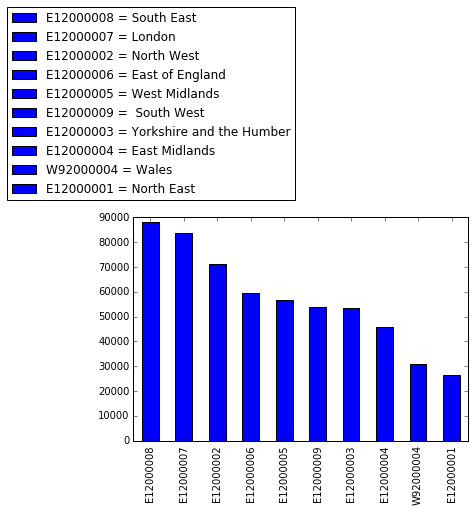

In [196]:
refinedData['Region'].value_counts().plot(kind="bar")

region1_patch = patch.Patch(label='E12000008 = South East')
region2_patch = patch.Patch(label='E12000007 = London')
region3_patch = patch.Patch(label='E12000002 = North West')
region4_patch = patch.Patch(label='E12000006 = East of England')
region5_patch = patch.Patch(label='E12000005 = West Midlands')
region6_patch = patch.Patch(label='E12000009 =  South West')
region7_patch = patch.Patch(label='E12000003 = Yorkshire and the Humber')
region8_patch = patch.Patch(label='E12000004 = East Midlands')
region9_patch = patch.Patch(label='W92000004 = Wales')
region10_patch = patch.Patch(label='E12000001 = North East')

plt.legend(handles=[region1_patch,region2_patch,region3_patch,region4_patch,region5_patch,region6_patch,region7_patch,region8_patch,region9_patch,region10_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

The second plot is a bar chart for the number of records for each occupation.

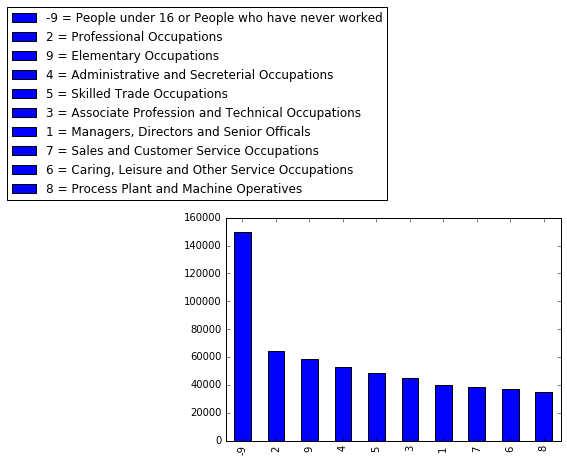

In [197]:
refinedData['Occupation'].value_counts().plot(kind="bar")

occupation1_patch = patch.Patch(label='-9 = People under 16 or People who have never worked')
occupation2_patch = patch.Patch(label='2 = Professional Occupations')
occupation3_patch = patch.Patch(label='9 = Elementary Occupations')
occupation4_patch = patch.Patch(label='4 = Administrative and Secreterial Occupations')
occupation5_patch = patch.Patch(label='5 = Skilled Trade Occupations')
occupation6_patch = patch.Patch(label='3 = Associate Profession and Technical Occupations')
occupation7_patch = patch.Patch(label='1 = Managers, Directors and Senior Officals')
occupation8_patch = patch.Patch(label='7 = Sales and Customer Service Occupations')
occupation9_patch = patch.Patch(label='6 = Caring, Leisure and Other Service Occupations')
occupation10_patch = patch.Patch(label='8 = Process Plant and Machine Operatives')

plt.legend(handles=[occupation1_patch,occupation2_patch,occupation3_patch,occupation4_patch,occupation5_patch,occupation6_patch,occupation7_patch,occupation8_patch,occupation9_patch,occupation10_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

The third plot is a pie chart for the distribution of the sample by age.

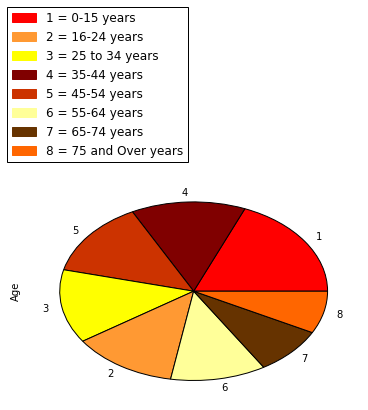

In [198]:
colors = ['#ff0000', '#800000', '#cc3300', '#ffff00', '#ff9933', '#ffff99', '#663300', '#ff6600']
    
refinedData['Age'].value_counts().plot(kind="pie", colors = colors)

five_patch = patch.Patch(color='#cc3300', label='5 = 45-54 years')
four_patch = patch.Patch(color='#800000', label='4 = 35-44 years')
two_patch = patch.Patch(color='#ff9933', label='2 = 16-24 years')
six_patch = patch.Patch(color='#ffff99', label='6 = 55-64 years')
seven_patch = patch.Patch(color='#663300', label='7 = 65-74 years')
one_patch = patch.Patch(color='#ff0000', label='1 = 0-15 years')
eight_patch = patch.Patch(color='#ff6600', label='8 = 75 and Over years')
three_patch = patch.Patch(color='#ffff00', label='3 = 25 to 34 years')

plt.legend(handles=[one_patch, two_patch, three_patch, four_patch, five_patch, six_patch, seven_patch, eight_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

The forth plot is a pie chart for the distribution of the sample by the economic activity.

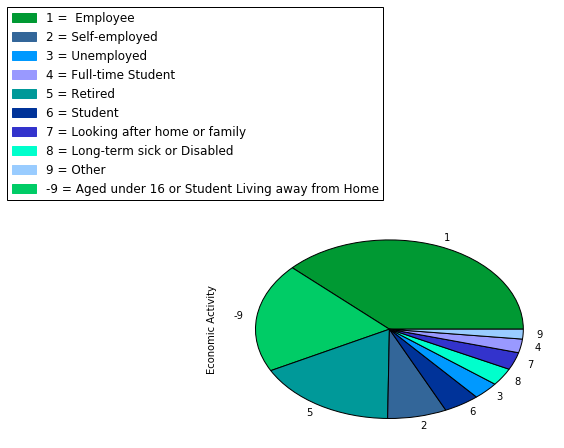

In [199]:
colors = ['#009933', '#00cc66', '#009999', '#336699', '#003399', '#0099ff', '#00ffcc', '#3333cc', '#9999ff', '#99ccff']
refinedData['Economic Activity'].value_counts().plot(kind="pie", colors = colors)

five_patch = patch.Patch(color='#009999', label='5 = Retired')
minusnine_patch = patch.Patch(color='#00cc66', label='-9 = Aged under 16 or Student Living away from Home')
six_patch = patch.Patch(color='#003399', label='6 = Student')
three_patch = patch.Patch(color='#0099ff', label='3 = Unemployed')
eight_patch = patch.Patch(color='#00ffcc', label='8 = Long-term sick or Disabled')
one_patch = patch.Patch(color='#009933', label='1 =  Employee')
seven_patch = patch.Patch(color='#3333cc', label='7 = Looking after home or family')
four_patch = patch.Patch(color='#9999ff', label='4 = Full-time Student')
nine_patch = patch.Patch(color='#99ccff', label='9 = Other')
two_patch = patch.Patch(color='#336699', label = '2 = Self-employed')

plt.legend(handles=[one_patch, two_patch, three_patch, four_patch, five_patch, six_patch, seven_patch, eight_patch, nine_patch, minusnine_patch], loc = 'lower right', bbox_to_anchor=(0.5,1.05))
plt.show()

The first easy additional requirement, is to produce two tables, using 'groupby' objects.
The first table to be produced is the number of record by region and industry.

In [200]:
byRegionAndIndustry = refinedData[['Region', 'Industry']].copy()
byRegionAndIndustry = byRegionAndIndustry.groupby(['Region', 'Industry']).size()
byRegionAndIndustry.reset_index(name='Count')

,Region,Industry,Count
0,E12000001,-9,6854
1,E12000001,1,132
2,E12000001,2,2851
3,E12000001,3,1574
4,E12000001,4,3087
5,E12000001,5,1300
6,E12000001,6,1438
7,E12000001,7,524
8,E12000001,8,1883
9,E12000001,9,1498


The second table to produce is the number of records by occupation and social grade.

In [201]:
byOccupationAndSocialGrade = refinedData[['Occupation', 'Approximated Social Grade']].copy()
byOccupationAndSocialGrade = byOccupationAndSocialGrade.groupby(['Occupation', 'Approximated Social Grade']).size()
byOccupationAndSocialGrade.reset_index(name='Count')

,Occupation,Approximated Social Grade,Count
0,-9,-9,116915
1,-9,1,1051
2,-9,2,17787
3,-9,3,2062
4,-9,4,12169
5,1,-9,492
6,1,1,19190
7,1,2,18555
8,1,3,584
9,1,4,967


The second easy additional requirement is to learn how to use pandas to perform various queries. The first being to find the number of economically active people by region.

In [202]:
data = refinedData[(refinedData['Economic Activity'] < 5) & (refinedData['Economic Activity']>-1)]

byRegionAndEconomicActivity = data[['Region', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Region']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Region,Count
0,E12000001,12897
1,E12000002,35204
2,E12000003,26843
3,E12000004,23106
4,E12000005,27930
5,E12000006,30568
6,E12000007,44454
7,E12000008,45551
8,E12000009,27453
9,W92000004,14877


The second to find the number of exonomically active people by age.

In [203]:
data = refinedData[(refinedData['Economic Activity'] < 5) & (refinedData['Economic Activity']>-1)]

byRegionAndEconomicActivity = data[['Age', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Age']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Age,Count
0,2,41663
1,3,64326
2,4,67050
3,5,65736
4,6,40584
5,7,8022
6,8,1502


The thrid to find wherther or not there are any discrepancies between the student status given by the question "Student" and answers on the question "Economic activity".

In [204]:
data = refinedData[((refinedData['Student'] == 1) & 
                   ((refinedData['Economic Activity'] != 4 ) &
                   (refinedData['Economic Activity'] != 6 ) &
                   (refinedData['Economic Activity'] != -9 ))) |
                   ((refinedData['Student'] == 2) & 
                   ((refinedData['Economic Activity'] == 4 ) &
                   (refinedData['Economic Activity'] == 6 ) &
                   (refinedData['Economic Activity'] == -9 )))]
data

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade


Finally, the forth is to find the number of working hours per week for students.

In [205]:
data = refinedData[(refinedData['Economic Activity'] == 4) | (refinedData['Economic Activity'] == 6)]

byRegionAndEconomicActivity = data[['Hours worked per week', 'Economic Activity']].copy()
byRegionAndEconomicActivity = byRegionAndEconomicActivity.groupby(['Hours worked per week']).size()
byRegionAndEconomicActivity.reset_index(name='Count')

,Hours worked per week,Count
0,-9,28110
1,1,6465
2,2,2334
3,3,1683
4,4,281


The first medium additional requirement is to create 3D plots for the data from the tables made in the first east additional requirement.
The first being the 3D plot for the number of records by region and industry.

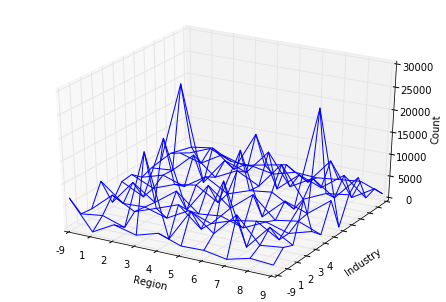

In [206]:
regionarray = ["E12000001","E12000002","E12000003","E12000004","E12000005","E12000006","E12000007","E12000008","E12000009","W92000004"]
industryarray = [-9,1,2,3,4,5,6,7,8,9,10,11,12]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.set_xlabel("Region")
ax.set_ylabel("Industry")
ax.set_zlabel("Count")

byRegionAndIndustry = refinedData[['Region', 'Industry']].copy()
byRegionAndIndustry = byRegionAndIndustry.groupby(['Region', 'Industry'])

z = byRegionAndIndustry.size().tolist()
axes = byRegionAndIndustry.groups.keys()
axes = sorted(axes, key=itemgetter(1))
axes = sorted(axes, key=itemgetter(0))
    
x = list(range(0, len(regionarray)))
ax.set_xticks(x)
y = list(range(0, len(industryarray)))
ax.set_yticks(y)

X, Y = np.meshgrid(x,y)
zs = np.array(z)
Z = zs.reshape(X.shape)

ax.plot_wireframe(X, Y, Z)

ax.set_xticklabels(np.array(occupationarray))
ax.set_yticklabels(np.array(socialarray))

plt.show()


The second being the 3D plot for the number of records by occupation and social grade.

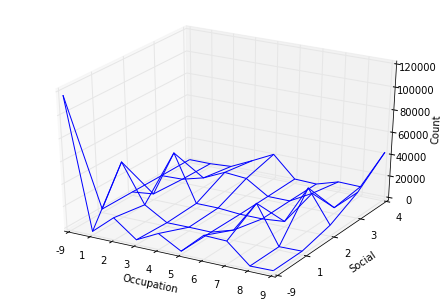

In [207]:
occupationarray = [-9,1,2,3,4,5,6,7,8,9]
socialarray = [-9,1,2,3,4]

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.set_xlabel("Occupation")
ax.set_ylabel("Social")
ax.set_zlabel("Count")

byOccupationAndSocialGrade = refinedData[['Occupation', 'Approximated Social Grade']].copy()
byOccupationAndSocialGrade = byOccupationAndSocialGrade.groupby(['Occupation', 'Approximated Social Grade'])

z = byOccupationAndSocialGrade.size().tolist()
axes = byOccupationAndSocialGrade.groups.keys()

axes = sorted(axes, key=itemgetter(1))
axes = sorted(axes, key=itemgetter(0))
        
x = list(range(0, len(occupationarray)))
ax.set_xticks(x)
y = list(range(0, len(socialarray)))
ax.set_yticks(y)

X, Y = np.meshgrid(x,y)
zs = np.array(z)
Z = zs.reshape(X.shape)

ax.plot_wireframe(X, Y, Z)

ax.set_xticklabels(np.array(occupationarray))
ax.set_yticklabels(np.array(socialarray))

plt.show()

In [209]:
regionData = refinedData['Region']
ageData = refinedData["Age"]
refinedData['Region'].unique()
refinedData['Age'].unique()

age = widgets.FloatSlider(
    value=1.0,
    min=1.0,
    max=8.0,
    step=1.0,
    description='Age:',
    continuous_update = False
)

container = widgets.HBox(population=[age] )

region = widgets.Select(
    description = 'Region:',
    options=list(refinedData['Region'].unique()),
)


g = GraphWidget('https://plot.ly/~kevintest/1192/')


#NOT SURE IF RIGHT THINGS TO VALIDATE
def validate():
     #print "validating"
    if region.value in refinedData['Region'].unique() and age.value in refinedData['Age'].unique():
        return True
    else:
        return False
    
def response(change):
    if validate():
        filter_list = [i and j for i,j in 
                      zip(refinedData['Region'] == region.value, refinedData['Age'] == age.value)]
        temp_rd = refinedData[filter_list]
        x1 = temp_rd['Region']
        g.restyle({'x': [x1], 'name': 'Population count', 'type': 'histogram', 
                    'opacity': 0.75}, indices=0)
        g.relayout({'barmode': 'overlay'})
        
region.observe(response, names="value")
age.observe(response, names="value")

adjustables = widgets.HBox([region, age])
display(adjustables)

NameError: name 'widgets' is not defined